In [ ]:
#With help from Sandy, particularly in the Part 1 exercises. Referenced this code when doing cos similarity for the Project 2. 

In [3]:
myAPIkey = "CYJUbGC4TcnBoLg8PF1HlnEhJEEPHlBv" #my API key

In [4]:
import requests, json

def getNYTArticles(year, month, apiKey):
    """Function that sends a request to the NYT API for all articles in a month
    and then stores the results in a JSON file.
    """
    # create URL
    URL = f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json?api-key={apiKey}"

    # send the request to get the data
    data = requests.get(URL)
    if data.status_code == 200:
        print("Successfully got the data.")

    dataJson = data.json() # get response as JSON

    with open(f"NYT_{year}-{month}.json", 'w') as fout:
        json.dump(dataJson, fout)

In [5]:
getNYTArticles(2024, 2, myAPIkey)

Successfully got the data.


In [6]:
with open("NYT_2024-2.json") as fin:
    articles = json.load(fin)

print(type(articles))

<class 'dict'>


In [7]:
articles.keys()

dict_keys(['copyright', 'response'])

In [8]:
for key in articles:
    print(key, type(articles[key]))
articles['copyright']

copyright <class 'str'>
response <class 'dict'>


'Copyright (c) 2024 The New York Times Company. All Rights Reserved.'

In [9]:
articles['response'].keys()

dict_keys(['docs', 'meta'])

In [10]:
for key in articles['response']:
    print(key, type(articles['response'][key]))

docs <class 'list'>
meta <class 'dict'>


In [11]:
# what is under the "meta" key?
# we see a key 'hits' and a value which is a number (3791)
articles['response']['meta']

{'hits': 3791}

In [12]:
len(articles['response']['docs'])

3791

In [13]:
articles['response']['docs'][0] # using indexing, because we know that the data is stored in a list

{'abstract': 'Periods of backlash take shape after surges of Black progress. We have entered another such period.',
 'web_url': 'https://www.nytimes.com/2024/01/31/opinion/racist-backlash-history.html',
 'snippet': 'Periods of backlash take shape after surges of Black progress. We have entered another such period.',
 'lead_paragraph': 'I am fascinated, and alarmed, by the swiftness with which periods of backlash take shape after surges of Black progress, and I believe that we have entered another such period.',
 'print_section': 'A',
 'print_page': '21',
 'source': 'The New York Times',
 'multimedia': [{'rank': 0,
   'subtype': 'xlarge',
   'caption': None,
   'credit': None,
   'type': 'image',
   'url': 'images/2024/02/01/multimedia/31blow1-hvfq/31blow1-hvfq-articleLarge.jpg',
   'height': 800,
   'width': 600,
   'subType': 'xlarge',
   'crop_name': 'articleLarge',
   'legacy': {'xlarge': 'images/2024/02/01/multimedia/31blow1-hvfq/31blow1-hvfq-articleLarge.jpg',
    'xlargewidth': 6

In [14]:
oneArticle = articles['response']['docs'][0]
for key in oneArticle:
    print(key, type(oneArticle[key]))

abstract <class 'str'>
web_url <class 'str'>
snippet <class 'str'>
lead_paragraph <class 'str'>
print_section <class 'str'>
print_page <class 'str'>
source <class 'str'>
multimedia <class 'list'>
headline <class 'dict'>
keywords <class 'list'>
pub_date <class 'str'>
document_type <class 'str'>
news_desk <class 'str'>
section_name <class 'str'>
byline <class 'dict'>
type_of_material <class 'str'>
_id <class 'str'>
word_count <class 'int'>
uri <class 'str'>


In [15]:
sections = [article['section_name'] for article in articles['response']['docs']]

# Let's look up a few of them
sections[:5]

['Opinion', 'New York', 'Opinion', 'World', 'U.S.']

In [16]:
from collections import Counter

distDct = Counter(sections) # count the occurrences of each section name

distDct.most_common(10)

[('U.S.', 734),
 ('World', 513),
 ('Arts', 326),
 ('Opinion', 272),
 ('Business Day', 244),
 ('New York', 200),
 ('Style', 174),
 ('Books', 139),
 ('Crosswords & Games', 125),
 ('Movies', 123)]

In [24]:
#Write a Python function that takes a date, for example, "2024-02-12", and returns the list of articles for that day.
def getArticlesforDate(day):
    year = int(day[:4])
    month = int(day[5:7])
    getNYTArticles(year, month, myAPIkey)

    with open(f"NYT_{year}-{month}.json") as inputFile:
        data = json.load(inputFile)

    articlesList = data['response']['docs']

    articles_day_list = []
    for article in articlesList:
        if article['pub_date'][:10] == day:
            articles_day_list.append(article)
    return articles_day_list
getArticlesforDate("2024-02-12")

Successfully got the data.


[{'abstract': 'A Cetaphil commercial showed a father and daughter connecting over football and the music superstar. But a social media influencer said the idea was stolen from her.',
  'web_url': 'https://www.nytimes.com/2024/02/11/business/cetaphil-taylor-swift-commercial.html',
  'snippet': 'A Cetaphil commercial showed a father and daughter connecting over football and the music superstar. But a social media influencer said the idea was stolen from her.',
  'lead_paragraph': 'When an advertisement for Cetaphil lotion was released online days before the Super Bowl, it drew rave reviews for a narrative that evoked a familiar story for parents, football fans and followers of Taylor Swift.',
  'source': 'The New York Times',
  'multimedia': [{'rank': 0,
    'subtype': 'xlarge',
    'caption': None,
    'credit': None,
    'type': 'image',
    'url': 'images/2024/02/11/business/11Cetaphil/11Cetaphil-articleLarge.jpg',
    'height': 338,
    'width': 600,
    'subType': 'xlarge',
    'cro

In [28]:
#Write some code that explores whether the fields "abstract" and "snippet" are always the same or they differ. 
resultOut = getArticlesforDate("2020-06-28")
resultOut[3]['abstract']

Successfully got the data.


'Quotation of the Day for Sunday, June 28, 2020.'

In [29]:
resultOut[3]['snippet'] #so it IS the same 

'Quotation of the Day for Sunday, June 28, 2020.'

In [33]:
for a in resultOut:
    if a['abstract'] != a['snippet']:
        print("This abstract isn't the same as the snippet:")
        print("Abstract:", a['abstract'],"\n")

In [43]:
#Write a function that given one article (in its nested structure), creates a flat dictionary with keys 
def flattenArticle(article):
    dict = {}
    categories = ['abstract', 'lead_paragraph', 'headline', 'keywords', 'pub_date', 'document_type', 'section_name']
    for c in categories:
        dict[c] = article[c]
    keywords = dict['keywords']
    keywords = [tag['value'] for tag in keywords] 
    dict['keywords'] = keywords
    return dict
    

In [44]:
flattenArticle(resultOut[0])

{'abstract': 'Mr. Biden released figures on Saturday after facing questions about racial diversity at the upper echelons of his campaign.',
 'lead_paragraph': 'Former Vice President Joseph R. Biden Jr. released statistics on the diversity of his presidential campaign staff on Saturday evening, announcing that 35 percent of his full-time staff members and 36 percent of his full-time senior staff members are people of color.',
 'headline': {'main': 'Biden Campaign Says Just Over a Third of 2020 Staff Members Are People of Color',
  'kicker': None,
  'content_kicker': None,
  'print_headline': 'One Third of Biden Campaign Staff Are People of Color',
  'name': None,
  'seo': None,
  'sub': None},
 'keywords': ['Presidential Election of 2020',
  'Race and Ethnicity',
  'Minorities',
  'Biden, Joseph R Jr',
  'Rodriguez, Julie Chavez',
  'Hiring and Promotion',
  'Sanders, Bernard'],
 'pub_date': '2020-06-28T00:08:58+0000',
 'document_type': 'article',
 'section_name': 'U.S.'}

In [47]:
import pandas as pd
def flattenEveryArticle(date):
    articles_of_the_day = getArticlesforDate(date)
    output_list = []
    for article in articles_of_the_day:
        output_list.append(flattenArticle(article))
    
    df = pd.DataFrame(output_list)
    file_name = f"articles_{date[:7]}.csv"
    df.to_csv(file_name, index=False)
    
    return df

In [48]:
allArticlesOnBday = flattenEveryArticle("2023-06-28")

Successfully got the data.


In [49]:
allArticlesOnBday

,abstract,lead_paragraph,headline,keywords,pub_date,document_type,section_name
0,See all results from the New York primary elec...,See all results from the New York primary elec...,"{'main': 'New York Primary Election Results', ...","[New York State, New York City, City Council (...",2023-06-28T00:35:03+0000,multimedia,U.S.
1,See full results from the New York City Counci...,See full results from the New York City Counci...,{'main': 'New York City Council Primary Electi...,"[New York State, New York City, City Council (...",2023-06-28T00:35:04+0000,multimedia,U.S.
2,Belarus said it had taken in the mercenary bos...,President Vladimir V. Putin of Russia on Tuesd...,{'main': 'Putin Casts Mutiny as Proof of Solid...,"[Russian Invasion of Ukraine (2022), Mercenari...",2023-06-28T00:36:46+0000,article,World
3,The 11-member board did not vote on the surpri...,"The PGA Tour’s board, with its members gathere...",{'main': 'PGA Tour Board Meets as Scrutiny of ...,"[Golf, Boards of Directors, Mergers, Acquisiti...",2023-06-28T00:45:14+0000,article,Sports
4,"Four men from Mexico were arrested this week, ...",Four more men have been arrested in Texas in c...,{'main': '4 More Arrested in Human Smuggling C...,"[Smuggling, Illegal Immigration, Deaths (Fatal...",2023-06-28T01:09:13+0000,article,U.S.
...,...,...,...,...,...,...,...
152,"R.F.K. Jr. is a walking, talking conspiracy th...",Let’s start with some positive things about Ro...,"{'main': 'You’re So Vain, You Probably Think T...","[Kennedy, Robert F Jr, Presidential Election o...",2023-06-28T23:19:37+0000,article,Opinion
153,Steven A. Cohen said his manager and general m...,Steven A. Cohen did not expect to be in this p...,{'main': 'Mets Owner Preaches Patience While R...,"[Baseball, New York Mets, Cohen, Steven A, Epp...",2023-06-28T23:37:23+0000,article,Sports
154,An influx of migrants has contributed to recor...,New York City passed a woeful milestone this w...,"{'main': 'A Record 100,000 People in New York ...","[Homeless Persons, Immigration and Emigration,...",2023-06-28T23:40:50+0000,article,New York
155,G.O.P. politicians today aren’t constitutional...,Before the dust had cleared on the 2020 electi...,"{'main': 'Republicans’ Anti-Woke, Anti-Vote Cr...","[State Legislatures, Transgender, Homosexualit...",2023-06-28T23:45:56+0000,article,Opinion


In [50]:
q = "red dress"

sentences = [
"she wore a dress and red earrings",
"the dress has a red wine stain",
"tomorrow I will wear my new red dress",
"the red dress in the photo resembles the red dress she is wearing",
"short dress",
"red lipstick"
]

def jaccard(text1, text2):
    """Implement Jaccard similarity. Assumes there is no punctuation in text."""
    sw1 = set(text1.lower().split()) # turn into a set of words
    sw2 = set(text2.lower().split())
    sim = len(sw1.intersection(sw2)) / len(sw1.union(sw2))
    return round(sim, 4) # round to 4 digits after the comma

def applyJaccard(query, sentences):
    """Appl the Jaccard similarity between query and each sentence"""
    results = []
    for sent in sentences:
        jac = jaccard(query, sent)
        results.append((jac, sent))
    
        # Sort in descending order
        results.sort(reverse=True)

    return results

# call the function

applyJaccard(q, sentences)

[(0.3333, 'short dress'),
 (0.3333, 'red lipstick'),
 (0.2857, 'the dress has a red wine stain'),
 (0.2857, 'she wore a dress and red earrings'),
 (0.25, 'tomorrow I will wear my new red dress'),
 (0.2222, 'the red dress in the photo resembles the red dress she is wearing')]

In [51]:
phrase = "that, that is the thing I want: dancing by the river! ah, the river, I have missed it so much!"
phrase.lower().split()

['that,',
 'that',
 'is',
 'the',
 'thing',
 'i',
 'want:',
 'dancing',
 'by',
 'the',
 'river!',
 'ah,',
 'the',
 'river,',
 'i',
 'have',
 'missed',
 'it',
 'so',
 'much!']

In [52]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [53]:
"".join(char for char in phrase if char not in string.punctuation)

'that that is the thing I want dancing by the river ah the river I have missed it so much'

In [54]:
def getVocabulary(textchunk):
    """Given some text, create the vocabulary of unique words."""
    textchunk = textchunk.lower()
    cleantext = "".join(char for char in textchunk if char not in string.punctuation)
    words = set(cleantext.split())
    voc = sorted(words)

    return voc

In [55]:
getVocabulary(" ".join(sentences))

['a',
 'and',
 'dress',
 'earrings',
 'has',
 'i',
 'in',
 'is',
 'lipstick',
 'my',
 'new',
 'photo',
 'red',
 'resembles',
 'she',
 'short',
 'stain',
 'the',
 'tomorrow',
 'wear',
 'wearing',
 'will',
 'wine',
 'wore']

In [56]:
def text2vector(sentence, voc):
    """Given a sentence and the vocabulary for the problem,
    turn every sentence into a vector.
    """
    cleantext = "".join(char for char in sentence if char not in string.punctuation)
    words = cleantext.lower().split()
    vector = [words.count(w) for w in voc]
    return vector

In [57]:
voc = getVocabulary(" ".join(sentences))
text2vector(sentences[0], voc)

[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [58]:
sentences[0]

'she wore a dress and red earrings'

In [59]:
list(zip(voc, text2vector(sentences[0], voc)))

[('a', 1),
 ('and', 1),
 ('dress', 1),
 ('earrings', 1),
 ('has', 0),
 ('i', 0),
 ('in', 0),
 ('is', 0),
 ('lipstick', 0),
 ('my', 0),
 ('new', 0),
 ('photo', 0),
 ('red', 1),
 ('resembles', 0),
 ('she', 1),
 ('short', 0),
 ('stain', 0),
 ('the', 0),
 ('tomorrow', 0),
 ('wear', 0),
 ('wearing', 0),
 ('will', 0),
 ('wine', 0),
 ('wore', 1)]

In [60]:
sent2vec = [text2vector(sent, voc) for sent in sentences]
sent2vec

[[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0],
 [0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [61]:
import pandas as pd
df = pd.DataFrame(sent2vec, 
                  columns=voc,
                  index=[f"doc_{i+1}" for i in range(len(sentences))])
df

,a,and,dress,earrings,has,i,in,is,lipstick,my,...,she,short,stain,the,tomorrow,wear,wearing,will,wine,wore
doc_1,1,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
doc_2,1,0,1,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
doc_3,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,1,0,1,0,0
doc_4,0,0,2,0,0,0,1,1,0,0,...,1,0,0,3,0,0,1,0,0,0
doc_5,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
import numpy as np
from numpy.linalg import norm
 
def cosineSimilarity(vec1, vec2):
    """Calculate the cosine similarity between two vectors."""
    V1 = np.array(vec1)
    V2 = np.array(vec2)
    cosine = np.dot(V1, V2)/(norm(V1)*norm(V2))
    return cosine

In [63]:
def rankDocuments(query, sentences):
    """Given a query and some sentences, rank the sentences for 
    which are the most similar to the query.
    """
    # Step 1: create vocabulary
    voc = getVocabulary(" ".join(sentences))

    # Step 2: generate vector for query
    queryVec = text2vector(query, voc)

    # Step 3: generate vector for sentences and calculate cosine similarity at once
    similarities = []
    for sent in sentences:
        sentVec = text2vector(sent, voc)
        sim = cosineSimilarity(queryVec, sentVec)
        similarities.append((round(sim, 4), sent)) # keep track of sentences

    similarities.sort(reverse=True) # most similar sentence at the top
    return similarities

In [64]:
rankDocuments("red dress", sentences)

[(0.5898, 'the red dress in the photo resembles the red dress she is wearing'),
 (0.5345, 'the dress has a red wine stain'),
 (0.5345, 'she wore a dress and red earrings'),
 (0.5, 'tomorrow I will wear my new red dress'),
 (0.5, 'short dress'),
 (0.5, 'red lipstick')]

In [65]:
springSentences = [
"As spring unfolds, the warmth of the season encourages the first blossoms to open, signaling longer days ahead.",
"Spring brings not only blooming flowers but also the anticipation of sunny days and outdoor activities.",
"With the arrival of spring, people begin planning their summer vacations, eager to enjoy the seasonal warmth.",
"The mild spring weather marks the transition from the cold winter to the inviting warmth of summer.",
"During spring, families often start spending more time outdoors, enjoying the season's pleasant temperatures and the promise of summer fun."
]

summerSentences = [
"Summer continues the season's trend of growth and warmth, with gardens full of life and days filled with sunlight.",
"The summer season is synonymous with outdoor adventures and enjoying the extended daylight hours that began in spring.",
"As summer arrives, the warm weather invites a continuation of the outdoor activities that people began enjoying in spring.",
"The transition into summer brings even warmer temperatures, allowing for beach visits and swimming, much awaited since the spring.",
"Summer vacations are often planned as the days grow longer, a pattern that starts in the spring, culminating in peak summer leisure."
]

In [67]:
allSentences = " ".join(springSentences) + " " + " ".join(summerSentences)
voc = getVocabulary(allSentences)
print(f"Vocabulary has {len(voc)} words.")

Vocabulary has 102 words.


In [66]:
sentVectors = [text2vector(sent, voc) for sent in springSentences+summerSentences]
print(len(sentVectors), len(sentVectors[0]))

10 24


In [68]:
oneSent = springSentences[0]
oneSent

'As spring unfolds, the warmth of the season encourages the first blossoms to open, signaling longer days ahead.'

In [69]:
pairs = list(zip(text2vector(oneSent, voc), voc))
nonZero = [pair for pair in pairs if pair[0] != 0]
nonZero

[(1, 'ahead'),
 (1, 'as'),
 (1, 'blossoms'),
 (1, 'days'),
 (1, 'encourages'),
 (1, 'first'),
 (1, 'longer'),
 (1, 'of'),
 (1, 'open'),
 (1, 'season'),
 (1, 'signaling'),
 (1, 'spring'),
 (3, 'the'),
 (1, 'to'),
 (1, 'unfolds'),
 (1, 'warmth')]

In [70]:
print(f"Words in sentence: {len(oneSent.split())}; nonzero terms in vector: {len(nonZero)}")

Words in sentence: 18; nonzero terms in vector: 16


In [71]:
simMatrix = []
for vec1 in sentVectors:
    simRow = []
    for vec2 in sentVectors:
        simRow.append(cosineSimilarity(vec1, vec2))
    simMatrix.append(simRow)

print(simMatrix)

[[1.0, 0.7071067811865475, 1.0, 1.0, 0.8944271909999159, 0.4472135954999579, 0.7559289460184544, 0.8164965809277261, 0.8944271909999159, 0.6666666666666666], [0.7071067811865475, 0.9999999999999998, 0.7071067811865475, 0.7071067811865475, 0.9486832980505138, 0.9486832980505138, 0.8017837257372731, 0.5773502691896258, 0.9486832980505138, 0.4714045207910316], [1.0, 0.7071067811865475, 1.0, 1.0, 0.8944271909999159, 0.4472135954999579, 0.7559289460184544, 0.8164965809277261, 0.8944271909999159, 0.6666666666666666], [1.0, 0.7071067811865475, 1.0, 1.0, 0.8944271909999159, 0.4472135954999579, 0.7559289460184544, 0.8164965809277261, 0.8944271909999159, 0.6666666666666666], [0.8944271909999159, 0.9486832980505138, 0.8944271909999159, 0.8944271909999159, 0.9999999999999998, 0.7999999999999998, 0.8451542547285165, 0.7302967433402214, 0.9999999999999998, 0.5962847939999439], [0.4472135954999579, 0.9486832980505138, 0.4472135954999579, 0.4472135954999579, 0.7999999999999998, 0.9999999999999998, 0.6

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

def drawHeatmap(sentLabels, simMtrx, plotTitle):
    """Draws a heatmap for the similarity matrix.
    """
    sns.set(font_scale=0.9)
    g = sns.heatmap(
          simMtrx, # similarity matrix with the cosine sim values
          xticklabels=sentLabels,
          yticklabels=sentLabels,
          vmin=0,
          vmax=1,
          cmap="YlOrRd")
    g.set_xticklabels(sentLabels, rotation=90)
    g.set_title(plotTitle, fontsize=14)
    plt.show()

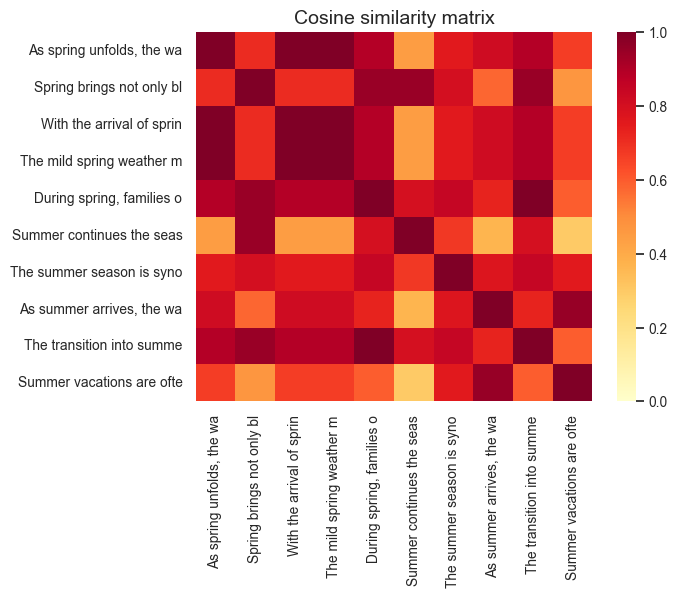

In [73]:
shortSent = [sent[:25] for sent in springSentences+summerSentences]
drawHeatmap(shortSent, simMatrix, "Cosine similarity matrix")

In [74]:
labels = [f"s{i+1}" for i in range(10)]
df = pd.DataFrame(simMatrix, columns=labels, index=labels)
df

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10
s1,1.000000,0.707107,1.000000,1.000000,0.894427,0.447214,0.755929,0.816497,0.894427,0.666667
s2,0.707107,1.000000,0.707107,0.707107,0.948683,0.948683,0.801784,0.577350,0.948683,0.471405
s3,1.000000,0.707107,1.000000,1.000000,0.894427,0.447214,0.755929,0.816497,0.894427,0.666667
s4,1.000000,0.707107,1.000000,1.000000,0.894427,0.447214,0.755929,0.816497,0.894427,0.666667
s5,0.894427,0.948683,0.894427,0.894427,1.000000,0.800000,0.845154,0.730297,1.000000,0.596285
s6,0.447214,0.948683,0.447214,0.447214,0.800000,1.000000,0.676123,0.365148,0.800000,0.298142
s7,0.755929,0.801784,0.755929,0.755929,0.845154,0.676123,1.000000,0.771517,0.845154,0.755929
s8,0.816497,0.577350,0.816497,0.816497,0.730297,0.365148,0.771517,1.000000,0.730297,0.952579
s9,0.894427,0.948683,0.894427,0.894427,1.000000,0.800000,0.845154,0.730297,1.000000,0.596285
s10,0.666667,0.471405,0.666667,0.666667,0.596285,0.298142,0.755929,0.952579,0.596285,1.000000


In [75]:
def getWords(sent):
    """Get the words of a sentence after lowercasing and removing punctuation."""
    cleantext = "".join(char for char in sent.lower() if char not in string.punctuation)
    cleanWords = cleantext.split()
    return cleanWords

In [76]:
def compareSentences(sent1, sent2):
    """Compare the content of two sentences."""
    words1 = getWords(sent1)
    words2 = getWords(sent2)
    commonWords = sorted([w for w in words1 if w in words2])
    print("COMPARISON RESULTS")
    print("Sent1: ", sent1)
    print("Sent2: ", sent2)
    print(f"Lengths of sentences: {len(words1)} and {len(words2)}. Words in common: {len(commonWords)}")
    print("Common words:", commonWords)

In [77]:
compareSentences(springSentences[0], springSentences[3])

COMPARISON RESULTS
Sent1:  As spring unfolds, the warmth of the season encourages the first blossoms to open, signaling longer days ahead.
Sent2:  The mild spring weather marks the transition from the cold winter to the inviting warmth of summer.
Lengths of sentences: 18 and 17. Words in common: 7
Common words: ['of', 'spring', 'the', 'the', 'the', 'to', 'warmth']


In [78]:
compareSentences(summerSentences[1], summerSentences[2]) #has more common words

COMPARISON RESULTS
Sent1:  The summer season is synonymous with outdoor adventures and enjoying the extended daylight hours that began in spring.
Sent2:  As summer arrives, the warm weather invites a continuation of the outdoor activities that people began enjoying in spring.
Lengths of sentences: 18 and 19. Words in common: 9
Common words: ['began', 'enjoying', 'in', 'outdoor', 'spring', 'summer', 'that', 'the', 'the']
